<a href="https://colab.research.google.com/github/malharg/bharatinternmalhar/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('data.csv')
data.drop(["date"],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [54]:
data.shape

(4600, 18)

In [52]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [53]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

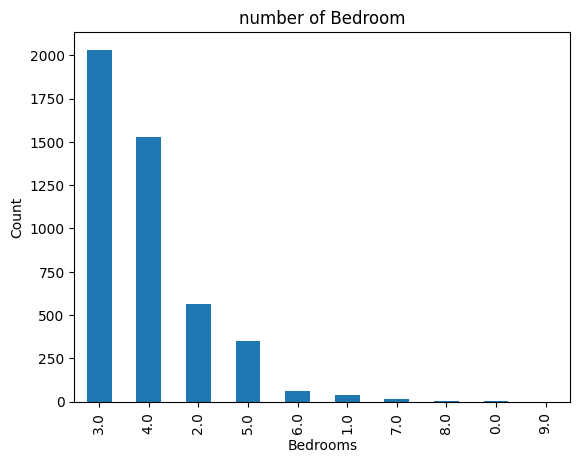

In [55]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

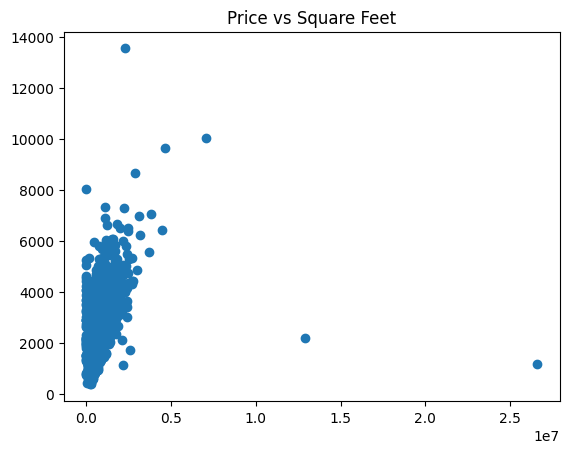

In [56]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

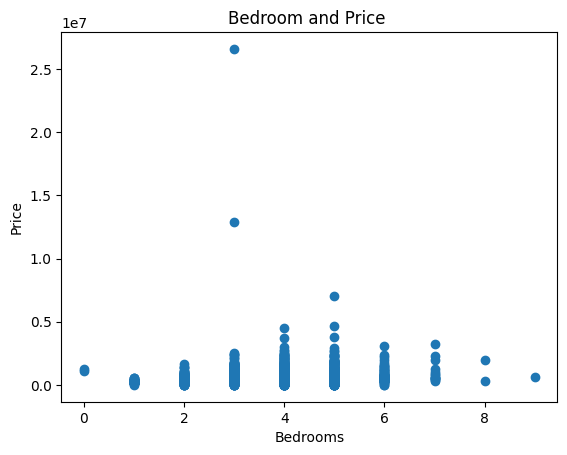

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [57]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

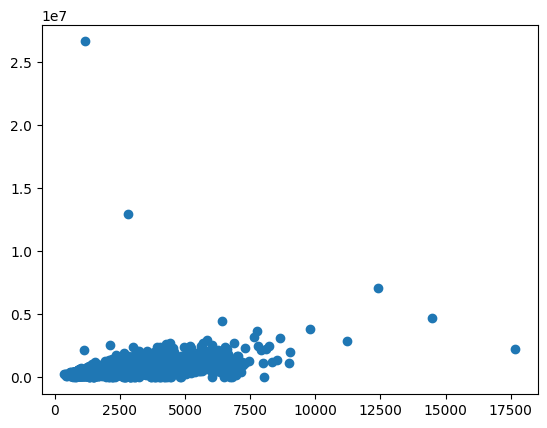

In [58]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

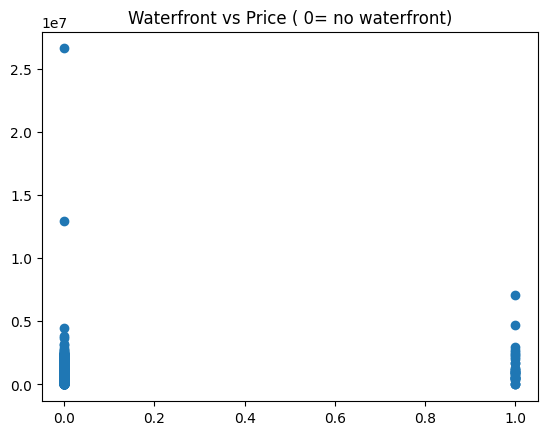

In [59]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [78]:
train_sample = data.drop(['street', 'price','city','statezip','country'],axis=1)

In [79]:
train_sample.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


<Axes: >

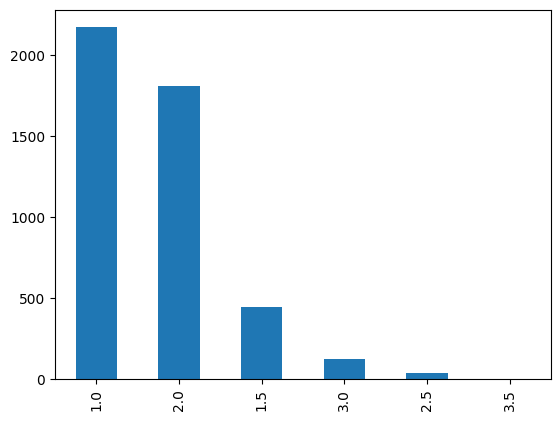

In [62]:
data.floors.value_counts().plot(kind='bar')

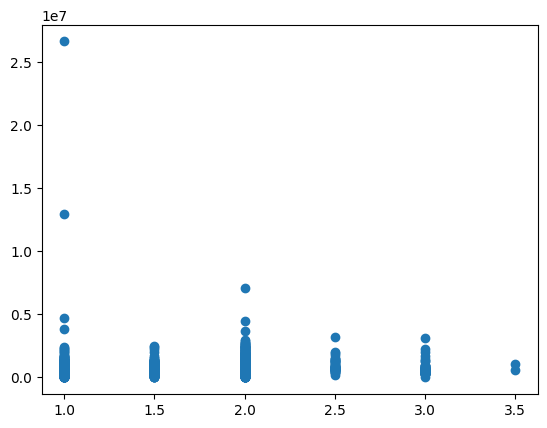

In [63]:
plt.scatter(data.floors,data.price)


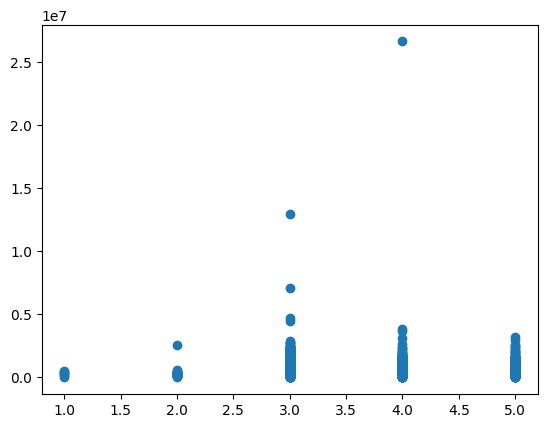

In [64]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by state zipcode?')

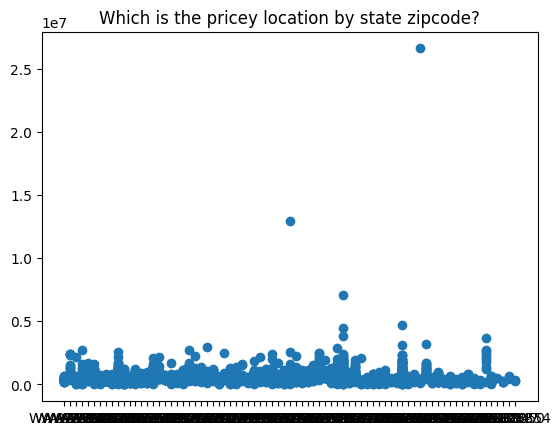

In [80]:
plt.scatter(data.statezip,data.price)
plt.title("Which is the pricey location by state zipcode?")

In [66]:
reg = LinearRegression()

In [81]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train_sample = data.drop(['street', 'price','city','statezip','country'],axis=1)

In [82]:
x_train , x_test , y_train , y_test = train_test_split(train_sample , labels , test_size = 0.10,random_state =2)

In [83]:
reg.fit(x_train,y_train)

LinearRegression()

In [84]:
reg.score(x_test,y_test)

0.6018955193361771

In [95]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1)


In [96]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [97]:
clf.score(x_test,y_test)

-0.5218061750091267

In [93]:
y_pred = reg.predict(x_test)

In [99]:
t_sc = np.zeros(400,dtype=np.float64)

In [100]:
y_pred = reg.predict(x_test)

In [101]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


In [102]:
testsc = np.arange(400)+1

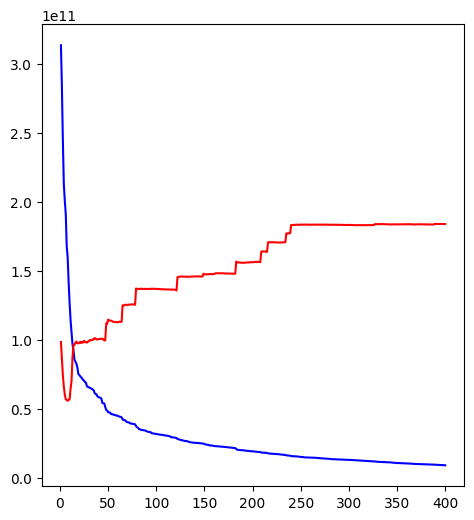

In [103]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [104]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [105]:
pca = PCA()

In [108]:
pca.fit_transform(scale(train_sample))

array([[-1.58712962e+00, -5.88853826e-01,  8.46304585e-01, ...,
         4.39268199e-02,  7.73093919e-17,  0.00000000e+00],
       [ 2.68502631e+00,  3.30757905e+00,  2.57059412e-01, ...,
         2.12960745e-01,  1.22698445e-14, -0.00000000e+00],
       [-7.40275348e-01, -6.54734658e-02, -7.51830200e-01, ...,
        -3.47610406e-01,  9.03333852e-16,  0.00000000e+00],
       ...,
       [ 1.76413325e+00, -1.70971830e+00,  7.93288252e-02, ...,
         3.29075528e-01,  5.01591454e-17,  0.00000000e+00],
       [-2.60226150e-01,  7.94414618e-01, -6.56061364e-01, ...,
         1.79168077e-01, -2.96647053e-17,  0.00000000e+00],
       [-1.05958928e-01, -1.09232087e+00, -5.82598137e-01, ...,
        -2.96551656e-01, -6.15803309e-17,  0.00000000e+00]])